# Installation instructions

1. Create virtual environment
    - virtualenv --system-site-packages -p python3 venv3
    - . ./venv3/bin/activate
2. Install kernels
    - cd kernels
    - ./build_all.sh
3. Install ipykernel
    - pip install --user ipykernel
    - python3 -m ipykernel install --user --name=varfloat
4. Select varfloat kernel
    - Kernel => Change Kernel => varfloat

In [37]:
import torch
import varfloat
import matplotlib.pyplot as plt

In [27]:
exp_bits = 3
fraction_bits = 2
round = True

# Saturation bounds depends on both eponent and fraction bits
bounds = varfloat.satBounds(exp_bits, fraction_bits)
print("min saturation: {}, max saturation: {}".format(bounds[0], bounds[1]))

x = torch.tensor([-110, 51.1, -1.1, 0.12], dtype=torch.float).cuda()
scale = x.abs().max() / bounds[1]

# rescale x and conver to varfloat
y = varfloat.fromFloat(x / scale, exp_bits, fraction_bits, round)
print(x)

# up scale
y_scaled = scale*y
print(y_scaled)

min saturation: 0.0625, max saturation: 28.0
tensor([-110.0000,   51.1000,   -1.1000,    0.1200], device='cuda:0')
tensor([-110.0000,   55.0000,   -0.9821,    0.0000], device='cuda:0')


min saturation: 0.0625, max saturation: 30.0
scale: 0.14478
MSE: 0.0007


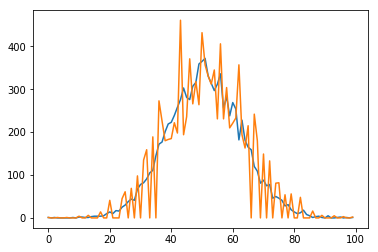

In [64]:
seed = 0
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

exp_bits = 3
fraction_bits = 3
round = True

# Saturation bounds depends on both eponent and fraction bits
bounds = varfloat.satBounds(exp_bits, fraction_bits)
print("min saturation: {}, max saturation: {}".format(bounds[0], bounds[1]))

x = torch.randn(10000).cuda()
scale = x.abs().max() / bounds[1]
print("scale: {:.5f}".format(scale))

# rescale x and conver to varfloat
y = varfloat.fromFloat(x / scale, exp_bits, fraction_bits, round) * scale

print("MSE: {:.4f}".format(torch.mean((y - x)**2)))

plt.plot(x.histc().cpu().numpy());
plt.plot(y.histc().cpu().numpy());